## AutoML Assignment - Sanket Sanap
### Bank Loan Status Classification



In [ ]:
#Reference [1]
# Import libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
from scipy.stats import linregress
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
#Reference [1]
# Set a minimum memory size and a run time in seconds
min_mem_size=6
#Increased Run time compared to refernece code
run_time=360

In [ ]:
#Reference [1]
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

0


In [ ]:
#Reference [1]
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:21893 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_311"; Java(TM) SE Runtime Environment (build 1.8.0_311-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.311-b11, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5q/w_y2sfjj2bv130sh86slry7r0000gq/T/tmp2uj_wvbs
  JVM stdout: /var/folders/5q/w_y2sfjj2bv130sh86slry7r0000gq/T/tmp2uj_wvbs/h2o_work_started_from_python.out
  JVM stderr: /var/folders/5q/w_y2sfjj2bv130sh86slry7r0000gq/T/tmp2uj_wvbs/h2o_work_started_from_python.err
  Server is running at http://127.0.0.1:21893
Connecting to H2O server at http://127.0.0.1:21893 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_work_mkazy0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## Abstract

In today's world where banking has became sophisticated like never before. However, this comes with great responsibility that Banks dont go in bad debt trap

Many times it may happen that when we apply for a Bank Loan and Bank would verify and conduct background check on us. This process can be automated with the help of Machine Learning and accurately predict the evaluation scheme if particular loan will be 'Fully Paid' or 'Charged Off'. Which means if Bank accepts particular person's loan application will it be Fully Paid or it won't

This could be very important for banking system to predict the results based upon customer's data and his/her finiancial details which could be a major factor for deciding whether or not loan application should be accepted or not for particular customer to automate Bank Loan Application Process

In this notebook I will be using H2O AutoML library to examine and evaluate scheme for 'Loan Status' prediction and identify better suitable model to go with and try to fine tune in order to get better performance metrics and results

### Import Bank Loan Status Dataset

Importing csv dataset from GitHub

In [ ]:
#Reference [1]
url = "https://raw.githubusercontent.com/sanapsanket/Bank-Loan-Status-Predictive-Analysis/main/KaggleDataset/BankLoanStatusDataset/credit_train.csv"
og_df = h2o.import_file(path = url)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Reading data in pd dataframe
og_pdf = pd.read_csv("https://raw.githubusercontent.com/sanapsanket/Bank-Loan-Status-Predictive-Analysis/main/KaggleDataset/BankLoanStatusDataset/credit_train.csv")


### Handling Missing / Null Values
Handling missing, null data by removing row for now

In [ ]:
#Getting rid of blank space in columns and Null/Missing Values
og_df=og_df.na_omit()
og_pdf = og_pdf.dropna()
og_pdf.rename(columns = {'Loan Status':'Loan_Status'}, inplace = True)
og_pdf.rename(columns = {'Current Loan Amount':'Current_Loan_Amount'}, inplace = True)
og_pdf.rename(columns = {'Credit Score':'Credit_Score'}, inplace = True)
og_pdf.rename(columns = {'Annual Income':'Annual_Income'}, inplace = True)
og_pdf.rename(columns = {'Years in current job':'Years_in_currentjob'}, inplace = True)
og_pdf.rename(columns = {'Home Ownership':'Home_Ownership'}, inplace = True)
og_pdf.rename(columns = {'Monthly Debt':'Monthly_Debt'}, inplace = True)
og_pdf.rename(columns = {'Years of Credit History':'Years_of_Credit_History'}, inplace = True)
og_pdf.rename(columns = {'Months since last delinquent':'Months_since_last_delinquent'}, inplace = True)
og_pdf.rename(columns = {'Number of Open Accounts':'Number_of_Open_Accounts'}, inplace = True)
og_pdf.rename(columns = {'Current Credit Balance':'Current_Credit_Balance'}, inplace = True)
og_pdf.rename(columns = {'Maximum Open Credit':'Maximum_Open_Credit'}, inplace = True)
df = og_df
pdf = og_pdf
df.head(1)


Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4EED4E6A-AA2F-4C91-8651-CE984EE8FB26,5EFB2B2B-BF11-4DFD-A572-3761A2694725,Fully Paid,1e+08,Short Term,741,2.23189e+06,8 years,Own Home,Debt Consolidation,29200.5,14.9,29,18,1,297996,750090,0,0


### Dropping Constant Columns Loan ID & Customer ID

In [ ]:
#Removing ID columns
df=df.drop('Loan ID')
df=df.drop('Customer ID')
print("Done")


Done


### Splitting Into Training, Testing frames
Splitting into 80-20% for training-testing frames respectively

In [ ]:
#Reference [1]
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])
print(df_train.shape)
print(df_test.shape)

(30353, 17)
(7657, 17)


### Setting Features and Target variables

In [ ]:

# Set target and predictor variables
X=df.columns
target ='Loan Status'
X.remove(target)
df_train[target]=df_train[target].asfactor()
df_test[target]=df_test[target].asfactor()
print(X)

['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


### Setting Up AutoML
Excluding StackedEnsemble and DeepLearning algorithms as these often provides better accuracy and performance metrics. However, they are more complex and harder to interpret.

Setting other parameters to create H2oAutoML instance

In [ ]:
# Seting AutoML Instance
exclude_algos = ["StackedEnsemble"]
aml = H2OAutoML(seed=1,max_runtime_secs=run_time, exclude_algos=exclude_algos)


### Training AutoML

In [ ]:
#Reference [1]
validation_frame = df_test
aml.train(x=X,y=target,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_1_20220213_183503


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,1369601.0,20.0,20.0,20.0,1508.0,2526.0,2170.52




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11698608831656919
RMSE: 0.34203229133602164
LogLoss: 0.3723709403507136
Mean Per-Class Error: 0.3679402749296822
AUC: 0.7989391463845695
AUCPR: 0.9343276834243399
Gini: 0.5978782927691391

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3400303904810479: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,1656.0,4607.0,0.7356,(4607.0/6263.0)
1,Fully Paid,7.0,24083.0,0.0003,(7.0/24090.0)
2,Total,1663.0,28690.0,0.152,(4614.0/30353.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.340030,0.912581,363.0
1,max f2,0.157813,0.963036,374.0
2,max f0point5,0.683361,0.874479,249.0
3,max accuracy,0.347268,0.847989,362.0
4,max precision,0.999999,0.999727,0.0
5,max recall,0.089850,1.000000,382.0
6,max specificity,0.999999,0.999840,0.0
7,max absolute_mcc,0.340030,0.469676,363.0
8,max min_per_class_accuracy,0.813539,0.704732,155.0
9,max mean_per_class_accuracy,0.793905,0.710515,171.0



Gains/Lift Table: Avg response rate: 79.37 %, avg score: 79.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.120713,1.000000,1.259640,1.259640,0.999727,1.000000,0.999727,1.000000,0.152055,0.152055,25.963951,25.963951,0.151895
1,2,0.150002,0.969328,1.207543,1.249467,0.958380,0.982576,0.991654,0.996598,0.035367,0.187422,20.754314,24.946739,0.181355
2,3,0.200013,0.944408,1.175320,1.230928,0.932806,0.955355,0.976940,0.986285,0.058780,0.246202,17.532048,23.092761,0.223848
3,4,0.300003,0.911100,1.152044,1.204636,0.914333,0.926770,0.956073,0.966449,0.115193,0.361395,15.204413,20.463600,0.297528
4,5,0.399993,0.882934,1.118832,1.183187,0.887974,0.897317,0.939050,0.949167,0.111872,0.473267,11.883204,18.318678,0.355113
5,6,0.500016,0.853106,1.089828,1.164511,0.864954,0.868224,0.924227,0.932976,0.109008,0.582275,8.982754,16.451124,0.398657
6,7,0.600007,0.820187,1.022932,1.140917,0.811862,0.837264,0.905502,0.917025,0.102283,0.684558,2.293215,14.091732,0.409769
7,8,0.699997,0.780753,1.003420,1.121277,0.796376,0.801280,0.889914,0.900492,0.100332,0.784890,0.342006,12.127670,0.411427
8,9,0.799987,0.721550,0.936996,1.098243,0.743657,0.753586,0.871633,0.882130,0.093690,0.878580,-6.300411,9.824350,0.380896
9,10,0.899977,0.613503,0.868081,1.072672,0.688962,0.676710,0.851338,0.859307,0.086800,0.965380,-13.191918,7.267174,0.316969




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.11593297254178676
RMSE: 0.3404893134032062
LogLoss: 0.3667889731613003
Mean Per-Class Error: 0.36843365799137795
AUC: 0.8076494772152462
AUCPR: 0.9386581420051009
Gini: 0.6152989544304923

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24818549126386646: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,1648.0,4615.0,0.7369,(4615.0/6263.0)
1,Fully Paid,0.0,24090.0,0.0,(0.0/24090.0)
2,Total,1648.0,28705.0,0.152,(4615.0/30353.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.248185,0.912586,386.0
1,max f2,0.248185,0.963099,386.0
2,max f0point5,0.709232,0.875002,260.0
3,max accuracy,0.347444,0.847956,383.0
4,max precision,0.999999,1.000000,0.0
5,max recall,0.248185,1.000000,386.0
6,max specificity,0.999999,1.000000,0.0
7,max absolute_mcc,0.248185,0.469923,386.0
8,max min_per_class_accuracy,0.809090,0.712438,175.0
9,max mean_per_class_accuracy,0.831258,0.713898,153.0



Gains/Lift Table: Avg response rate: 79.37 %, avg score: 79.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.094323,1.000000,1.259983,1.259983,1.000000,1.000000,1.000000,1.000000,0.118846,0.118846,25.998340,25.998340,0.118846
1,2,0.100056,0.997368,1.259983,1.259983,1.000000,0.998765,1.000000,0.999929,0.007223,0.126069,25.998340,25.998340,0.126069
2,3,0.150002,0.955913,1.245854,1.255279,0.988786,0.975854,0.996266,0.991913,0.062225,0.188294,24.585429,25.527887,0.185580
3,4,0.200013,0.929068,1.194411,1.240059,0.947958,0.940559,0.984187,0.979072,0.059734,0.248028,19.441114,24.005943,0.232700
4,5,0.300003,0.897691,1.160347,1.213492,0.920923,0.912482,0.963101,0.956878,0.116023,0.364051,16.034715,21.349159,0.310403
5,6,0.399993,0.872328,1.142081,1.195640,0.906425,0.885032,0.948933,0.938918,0.114197,0.478248,14.208050,19.564029,0.379254
6,7,0.500016,0.846813,1.079867,1.172481,0.857049,0.859742,0.930553,0.923080,0.108012,0.586260,7.986719,17.248109,0.417970
7,8,0.600007,0.817264,1.014214,1.146106,0.804942,0.832422,0.909620,0.907972,0.101411,0.687671,1.421398,14.610614,0.424858
8,9,0.699997,0.780625,0.988890,1.123649,0.784843,0.799826,0.891796,0.892524,0.098879,0.786550,-1.111023,12.364877,0.419474
9,10,0.799987,0.729545,0.927447,1.099126,0.736079,0.757240,0.872333,0.875615,0.092736,0.879286,-7.255258,9.912562,0.384316




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.848318,0.004599,0.846648,0.844177,0.853731,0.852718,0.844316
1,auc,0.807715,0.006011,0.808551,0.812906,0.799848,0.813796,0.803472
2,err,0.151682,0.004599,0.153352,0.155823,0.146269,0.147282,0.155684
3,err_count,920.800000,27.923110,931.000000,946.000000,888.000000,894.000000,945.000000
4,f0point5,0.867578,0.003901,0.866287,0.863708,0.872288,0.871118,0.864491
5,f1,0.912727,0.002779,0.911628,0.910230,0.916100,0.915293,0.910384
6,f2,0.962836,0.001423,0.961978,0.962048,0.964546,0.964187,0.961423
7,lift_top_group,1.260004,0.005629,1.262687,1.265847,1.252011,1.256469,1.263005
8,logloss,0.366789,0.005737,0.367652,0.371290,0.363648,0.358666,0.372687
9,max_per_class_error,0.732765,0.009737,0.732383,0.741961,0.725859,0.720742,0.742880



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-13 18:37:22,18.372 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-13 18:37:23,18.755 sec,5.0,0.395899,2.503977,0.711524,0.879178,1.125272,0.167216
2,,2022-02-13 18:37:23,19.039 sec,10.0,0.371072,1.168720,0.739407,0.897811,1.171255,0.156782
3,,2022-02-13 18:37:23,19.347 sec,15.0,0.359326,0.673008,0.757699,0.911269,1.212130,0.153400
4,,2022-02-13 18:37:24,19.608 sec,20.0,0.352877,0.501660,0.769149,0.919118,1.236332,0.152417
5,,2022-02-13 18:37:24,19.891 sec,25.0,0.349059,0.436038,0.777309,0.923976,1.248071,0.152374
6,,2022-02-13 18:37:24,20.173 sec,30.0,0.347002,0.405380,0.782437,0.926820,1.253668,0.152110
7,,2022-02-13 18:37:24,20.449 sec,35.0,0.345142,0.390088,0.787995,0.929540,1.256729,0.151912
8,,2022-02-13 18:37:25,20.736 sec,40.0,0.343639,0.379881,0.792710,0.931757,1.258654,0.151978
9,,2022-02-13 18:37:25,21.041 sec,45.0,0.342737,0.374306,0.795741,0.933039,1.259647,0.151847



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit Score,45095.156250,1.000000,0.371349
1,Current Loan Amount,12373.941406,0.274396,0.101897
2,Years in current job,7826.764160,0.173561,0.064452
3,Annual Income,7698.464844,0.170716,0.063395
4,Years of Credit History,7652.119629,0.169688,0.063014
5,Months since last delinquent,7357.158203,0.163147,0.060585
6,Monthly Debt,7160.150879,0.158779,0.058962
7,Number of Open Accounts,6200.461426,0.137497,0.051060
8,Current Credit Balance,5498.433105,0.121930,0.045278
9,Purpose,4389.754395,0.097344,0.036149


### Leaderboard Statistics
This chart will show accuracy metrics for differnet models used with different hyperparameter in the order of `High-Low` accuracy performance

As we can see for this dataset, **`DRF`** (Distributed Random Forest) model is the most accurate model among other model shown in AutoML leaderboard. As, AUC (Area Under Curve) is highest (**80.16%**) and MSE (**0.117**), RMSE (**0.3421**) are loweset among all other model shown in leaderboard above.

In [ ]:
#Reference [1]
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20220213_183503,0.807649,0.366789,0.938658,0.368434,0.340489,0.115933
XRT_1_AutoML_1_20220213_183503,0.802078,0.369317,0.936287,0.36661,0.341326,0.116503
GBM_4_AutoML_1_20220213_183503,0.78621,0.376841,0.929397,0.368354,0.34408,0.118391
GBM_1_AutoML_1_20220213_183503,0.784553,0.376609,0.929378,0.367482,0.344078,0.118389
GBM_3_AutoML_1_20220213_183503,0.783788,0.376811,0.929125,0.366708,0.34435,0.118577
GBM_2_AutoML_1_20220213_183503,0.783614,0.376405,0.92917,0.365804,0.344095,0.118401
GBM_5_AutoML_1_20220213_183503,0.783439,0.376838,0.929016,0.365405,0.344273,0.118524
GBM_grid_1_AutoML_1_20220213_183503_model_1,0.77981,0.391565,0.925559,0.368196,0.347836,0.12099
XGBoost_3_AutoML_1_20220213_183503,0.779356,0.377794,0.927366,0.368434,0.345421,0.119315
XGBoost_grid_1_AutoML_1_20220213_183503_model_2,0.777411,0.383017,0.926265,0.367367,0.347092,0.120473


In [ ]:
best = aml.get_best_model()
best.accuracy()

[[0.3472675434169177, 0.8479886666886305]]

In [ ]:
#Reference [1]
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass 
    return d

In [ ]:
#Reference [1]
mod_perf=best.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.11812030748549714,
 'rmse': 0.34368635044979184,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.37242836505261956,
 'auc': 0.8100275877892398,
 'gini': 0.6200551755784796}

In [ ]:
#Reference [1]
predictions = best.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
#Reference [1]
y_pred=h2o.as_list(predictions)
y_pred[:5]

,predict,Charged Off,Fully Paid
0,Fully Paid,0.216892,0.783108
1,Fully Paid,0.144059,0.855941
2,Fully Paid,0.000000,1.000000
3,Fully Paid,0.255310,0.744690
4,Charged Off,0.980000,0.020000


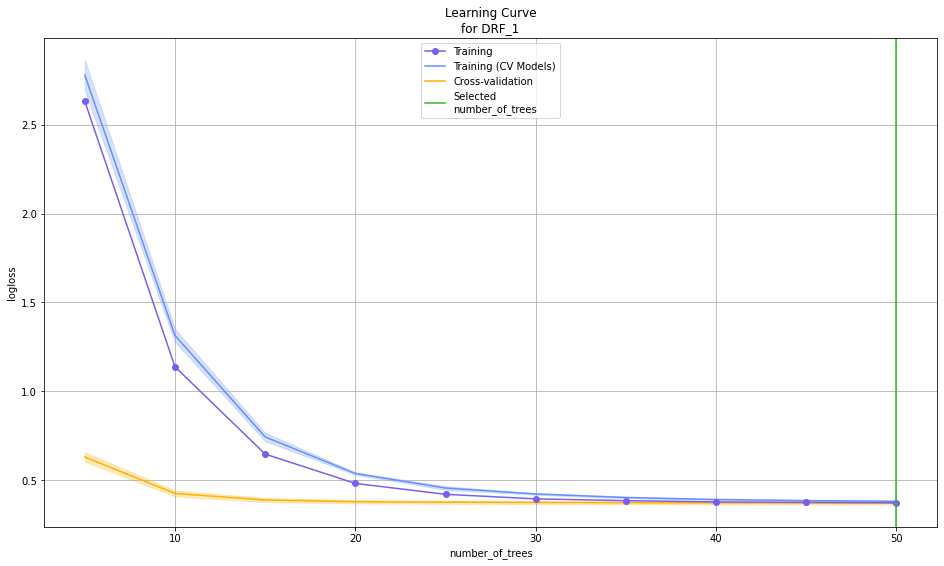

In [ ]:
best.learning_curve_plot()

## Is Relationship Significant ?
To identify how important a particular feature for the model, I will be using variable importance statistcs

As we can see in variable importance statistics metrics, **`scaled_importance`** shows how important particular feature / variable is, in range of **0-1**, where value closer to **1** means highly important and value closer to **0** meand less important
    
We can clearly see that `Credit Score` is the highly important feature along with `Current Loan Amount` `Annual Income` `Years in current job` etc are important with 12% - 27% importance which make sense considering domain knowledge

There are few features, specifically at the end of table which have less importance less than 10% like `Purpose` `Tax Liens` `Term` etc. These feature may be removed from traing and we can observe if there is any increase/ decrease in accuracy metrics in later stage of this notebook

In [ ]:
best.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Credit Score,45095.156250,1.000000,0.371349
1,Current Loan Amount,12373.941406,0.274396,0.101897
2,Years in current job,7826.764160,0.173561,0.064452
3,Annual Income,7698.464844,0.170716,0.063395
4,Years of Credit History,7652.119629,0.169688,0.063014
5,Months since last delinquent,7357.158203,0.163147,0.060585
6,Monthly Debt,7160.150879,0.158779,0.058962
7,Number of Open Accounts,6200.461426,0.137497,0.051060
8,Current Credit Balance,5498.433105,0.121930,0.045278
9,Purpose,4389.754395,0.097344,0.036149


## Are any model assumptions violated ?


As we saw **`DRF`** (Distributed Random Forest) model is the most accurate model for this data set

There are some general assumptions used such as dependent/target variable should be qualitative i.e.categorical variables and in this case `Loan Status` is falls under binary classification i.e. 'Fully Paid' or 'Charged Off' class

For Random Forest assumptions are, 
* At each step while creating a individual tree best split of data is considered and splitting continued further
* Instead of whole data bootstrap sample data is used from the population
* Bagging is used

So, There seems **no** assumption violated as can be seen in below graphs as the number of trees increase the `classification_error`, `rmse`, `logloss` decreases and `AUC` increase significantly. Which would indicate that sample data representation did not affect the performance, accuracy of the model.


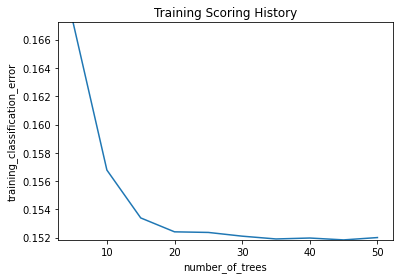

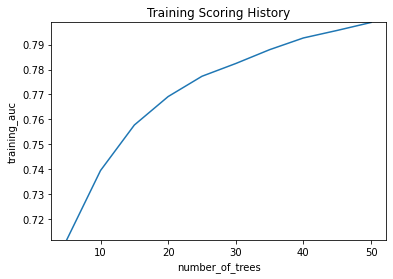

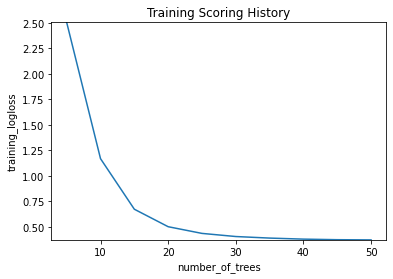

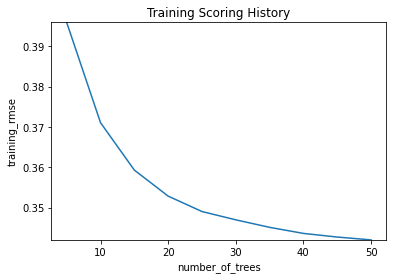

In [ ]:
best.plot(metric='classification_error')
print("")
best.plot(metric='auc')
print("")
best.plot(metric='logloss')
print("")
best.plot(metric='rmse')


### Is there Multicollinearity in the model ?

As shown in below Correlation matrics, there is very low Multicollinearity i.e. indipendent variables are co-linear with each other. 

At threshold of 75% or 80% there is very less Multicollinearity, provided that `Number of Credit Problems` and `Bankruptcies` shows as 70%, `Monthly Debt` and `Annual Income` has 55%, `Current Credit Balance` and `Monthly Debt` has 44% etc.

In [ ]:
pdf.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens
Current_Loan_Amount,1.000000,-0.091345,0.014758,-0.003642,0.017056,0.012938,0.004405,-0.002140,0.009030,-0.000508,-0.002362,-0.003566
Credit_Score,-0.091345,1.000000,-0.019661,0.008614,-0.011369,-0.003322,0.013045,-0.001187,-0.001974,-0.003887,-0.007259,0.009064
Annual_Income,0.014758,-0.019661,1.000000,0.550253,0.174606,-0.076599,0.137217,-0.017161,0.351848,0.053694,-0.060960,0.058750
Monthly_Debt,-0.003642,0.008614,0.550253,1.000000,0.176675,-0.058531,0.378374,-0.046957,0.445240,0.043217,-0.073098,0.029356
Years_of_Credit_History,0.017056,-0.011369,0.174606,0.176675,1.000000,-0.043813,0.099213,0.020433,0.204668,0.029807,0.020519,0.008878
Months_since_last_delinquent,0.012938,-0.003322,-0.076599,-0.058531,-0.043813,1.000000,-0.029901,0.103422,-0.026585,-0.006517,0.124807,0.012115
Number_of_Open_Accounts,0.004405,0.013045,0.137217,0.378374,0.099213,-0.029901,1.000000,-0.014211,0.225738,0.032036,-0.019409,0.000633
Number of Credit Problems,-0.002140,-0.001187,-0.017161,-0.046957,0.020433,0.103422,-0.014211,1.000000,-0.111532,-0.012235,0.702526,0.602210
Current_Credit_Balance,0.009030,-0.001974,0.351848,0.445240,0.204668,-0.026585,0.225738,-0.111532,1.000000,0.166300,-0.122310,-0.016413
Maximum_Open_Credit,-0.000508,-0.003887,0.053694,0.043217,0.029807,-0.006517,0.032036,-0.012235,0.166300,1.000000,-0.016441,-0.003200


### Are Predictor Variables Independent ?

As we can from below heatmap of corelation metrics, most of the independent variables are not corelated with other independent variables. Hence, Such variables are independent

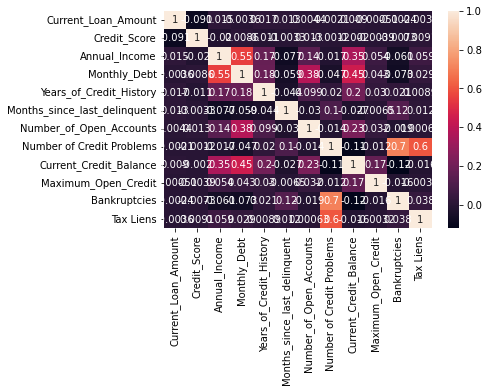

In [ ]:

sns.heatmap(pdf.corr(), annot=True)
plt.show()


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220213_183503 on column 'Credit Score'.


,credit_score,mean_response,stddev_response,std_error_mean_response
0,585.000000,0.681938,0.160143,0.000919
1,949.473684,0.830663,0.138229,0.000793
2,1313.947368,0.830663,0.138229,0.000793
3,1678.421053,0.830663,0.138229,0.000793
4,2042.894737,0.830663,0.138229,0.000793
5,2407.368421,0.830663,0.138229,0.000793
6,2771.842105,0.830663,0.138229,0.000793
7,3136.315789,0.830663,0.138229,0.000793
8,3500.789474,0.227022,0.156514,0.000898
9,3865.263158,0.097407,0.169120,0.000971



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220213_183503 on column 'Current Loan Amount'.


,current_loan_amount,mean_response,stddev_response,std_error_mean_response
0,2.145000e+04,0.755481,0.222837,0.001279
1,5.283479e+06,0.699754,0.216403,0.001242
2,1.054551e+07,0.699754,0.216403,0.001242
3,1.580754e+07,0.699754,0.216403,0.001242
4,2.106957e+07,0.699754,0.216403,0.001242
5,2.633159e+07,0.699754,0.216403,0.001242
6,3.159362e+07,0.699754,0.216403,0.001242
7,3.685565e+07,0.699754,0.216403,0.001242
8,4.211768e+07,0.699754,0.216403,0.001242
9,4.737971e+07,0.699754,0.216403,0.001242



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220213_183503 on column 'Annual Income'.


,annual_income,mean_response,stddev_response,std_error_mean_response
0,111245.0,0.642664,0.216465,0.001242
1,1728495.0,0.814509,0.227048,0.001303
2,3345745.0,0.809292,0.222923,0.001280
3,4962995.0,0.807166,0.221645,0.001272
4,6580245.0,0.789093,0.219448,0.001260
5,8197495.0,0.786941,0.219153,0.001258
6,9814745.0,0.784266,0.218297,0.001253
7,11431995.0,0.779156,0.217391,0.001248
8,13049245.0,0.779156,0.217391,0.001248
9,14666495.0,0.779156,0.217391,0.001248



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220213_183503 on column 'Monthly Debt'.


,monthly_debt,mean_response,stddev_response,std_error_mean_response
0,0.00,0.781426,0.225808,0.001296
1,12055.68,0.799342,0.237993,0.001366
2,24111.36,0.771505,0.237371,0.001362
3,36167.04,0.752821,0.234383,0.001345
4,48222.72,0.730328,0.230991,0.001326
5,60278.40,0.706748,0.227573,0.001306
6,72334.08,0.689322,0.227319,0.001305
7,84389.76,0.677762,0.224242,0.001287
8,96445.44,0.673720,0.223265,0.001282
9,108501.12,0.674023,0.223163,0.001281



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220213_183503 on column 'Current Credit Balance'.


,current_credit_balance,mean_response,stddev_response,std_error_mean_response
0,0.0,0.783067,0.244194,0.001402
1,386859.0,0.783603,0.243133,0.001396
2,773718.0,0.760765,0.237635,0.001364
3,1160577.0,0.746065,0.233401,0.001340
4,1547436.0,0.742676,0.229890,0.001320
5,1934295.0,0.722908,0.227066,0.001303
6,2321154.0,0.716728,0.226689,0.001301
7,2708013.0,0.713825,0.225068,0.001292
8,3094872.0,0.706781,0.224399,0.001288
9,3481731.0,0.706310,0.224147,0.001287



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220213_183503 on column 'Purpose'.


,purpose,mean_response,stddev_response,std_error_mean_response
0,Business Loan,0.727714,0.230578,0.001323
1,Buy House,0.773845,0.227217,0.001304
2,Buy a Car,0.802933,0.234151,0.001344
3,Debt Consolidation,0.795580,0.249795,0.001434
4,Educational Expenses,0.819983,0.232959,0.001337
5,Home Improvements,0.778291,0.237750,0.001365
6,Medical Bills,0.767185,0.234266,0.001345
7,Other,0.795689,0.229348,0.001316
8,Take a Trip,0.801495,0.230642,0.001324
9,major_purchase,0.769235,0.234979,0.001349


[, , , , , ]

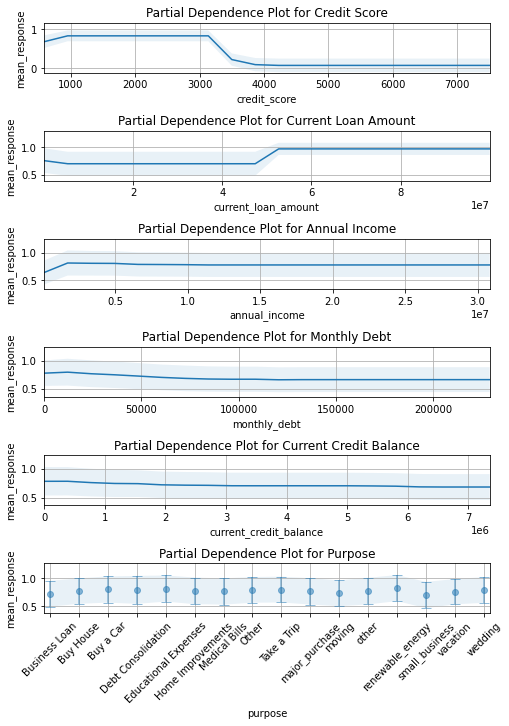

In [ ]:
best.partial_plot(df_train,cols=['Credit Score','Current Loan Amount','Annual Income','Monthly Debt','Current Credit Balance','Purpose'])


### Ranking of the most significant predictor variables

From the **`DRF`** model, below is the ranked table from most significant to least significant predictor variables

Predictor with importance less than 9% is excluded from the model hereonwards Ex. `Term` 3.3%, `Number of Credit Problems` 2.8% and `Tax Liens` 1.24% etc.

**scaled_importance** column indicates the % of importance for individual predictors

In [ ]:
variableIMP = best.varimp(use_pandas=True)
#Converting values into % for scaled_importance column
variableIMP.scaled_importance=variableIMP.scaled_importance*100
#Getting rid of insignificant predictors
highIMP = variableIMP.where(variableIMP.scaled_importance > 9)
highIMP = highIMP.dropna()
highIMP

,variable,relative_importance,scaled_importance,percentage
0,Credit Score,45095.156250,100.000000,0.371349
1,Current Loan Amount,12373.941406,27.439624,0.101897
2,Years in current job,7826.764160,17.356108,0.064452
3,Annual Income,7698.464844,17.071600,0.063395
4,Years of Credit History,7652.119629,16.968828,0.063014
5,Months since last delinquent,7357.158203,16.314742,0.060585
6,Monthly Debt,7160.150879,15.877871,0.058962
7,Number of Open Accounts,6200.461426,13.749728,0.051060
8,Current Credit Balance,5498.433105,12.192957,0.045278
9,Purpose,4389.754395,9.734426,0.036149


### Does the model make sense ?

As we can see in below performance metrics, The `DRF` model has performed better than other models from leaderboard

As AUC (**80.7%**) is highest and MSE (**0.11**), RMSE (**0.34**) and LogLoss (**0.36**) are lesser among all other model. 

Also, from cross validation summary we can see that apart from AUC and MSE the Precision (**83%**), Recall (**99.7%**) 

F1_Score (**0.91**) which is good as F1 score tells about the balance between Precision and Recall values

F2_Score (**0.96**) which is good as F2 score penlize model for false negatives and its weighted harmonic mean of the precision and recall
 
Naturally, DRF prevents overfitting by creating a forest of classification trees it follows bootstrap sampling and aggregation techniques to prevent overfitting.

However, There is a scope for improvement in this `DRF` model by preventing overfitting by `Pre-Pruning` technique by tuning hyperparameters such as `No.of Trees`, `Max Depth`. This will stop the early growth of the tree and prevent the model from overfitting.

In [ ]:
# mod_perf = best.model_performance(df_test)
# stats_test = {}
# stats_test = model_performance_stats(mod_perf)
# stats_test
aml.leaderboard[0:1,:]


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20220213_183503,0.807649,0.366789,0.938658,0.368434,0.340489,0.115933


In [ ]:
# F1 Score
best.model_performance().F1()

[[0.3400303904810479, 0.9125805229253504]]

In [ ]:
# F2 Score
best.model_performance().F2()

[[0.15781280868931824, 0.9630361083570538]]

In [ ]:
best.accuracy(train=True,xval=True)

{'train': [[0.3472675434169177, 0.8479886666886305]],
 'xval': [[0.3474439989030361, 0.8479557210160446]]}

In [ ]:
best.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.848318,0.004599,0.846648,0.844177,0.853731,0.852718,0.844316
1,auc,0.807715,0.006011,0.808551,0.812906,0.799848,0.813796,0.803472
2,err,0.151682,0.004599,0.153352,0.155823,0.146269,0.147282,0.155684
3,err_count,920.800000,27.923110,931.000000,946.000000,888.000000,894.000000,945.000000
4,f0point5,0.867578,0.003901,0.866287,0.863708,0.872288,0.871118,0.864491
5,f1,0.912727,0.002779,0.911628,0.910230,0.916100,0.915293,0.910384
6,f2,0.962836,0.001423,0.961978,0.962048,0.964546,0.964187,0.961423
7,lift_top_group,1.260004,0.005629,1.262687,1.265847,1.252011,1.256469,1.263005
8,logloss,0.366789,0.005737,0.367652,0.371290,0.363648,0.358666,0.372687
9,max_per_class_error,0.732765,0.009737,0.732383,0.741961,0.725859,0.720742,0.742880


### Preparing Model To Re-Train


In [ ]:
og_df=og_df.na_omit()
og_pdf = og_pdf.dropna()
newdf = og_df
newpdf = og_pdf

### Which Independent Variables Are Significant ?

As we saw earlier, there are few insignificant predictors in the data
So, Removing them from data and keeping other significant predictors only as shown below

In [ ]:
highIMP

,variable,relative_importance,scaled_importance,percentage
0,Credit Score,45095.156250,100.000000,0.371349
1,Current Loan Amount,12373.941406,27.439624,0.101897
2,Years in current job,7826.764160,17.356108,0.064452
3,Annual Income,7698.464844,17.071600,0.063395
4,Years of Credit History,7652.119629,16.968828,0.063014
5,Months since last delinquent,7357.158203,16.314742,0.060585
6,Monthly Debt,7160.150879,15.877871,0.058962
7,Number of Open Accounts,6200.461426,13.749728,0.051060
8,Current Credit Balance,5498.433105,12.192957,0.045278
9,Purpose,4389.754395,9.734426,0.036149


In [ ]:
# Remvoing constant/bad columns
newdf=newdf.drop('Loan ID')
newdf=newdf.drop('Customer ID')

#Removing insignificant predictors
newdf=newdf.drop('Tax Liens')
newdf=newdf.drop('Bankruptcies')
newdf=newdf.drop('Number of Credit Problems')
newdf=newdf.drop('Term')
newdf=newdf.drop('Home Ownership')
print("Done")

Done


In [ ]:
#Reference [1]
# Create a 80/20 train/test splie
pct_rows=0.80
newdf_train, newdf_test = newdf.split_frame([pct_rows])
print("Training: ",newdf_train.shape)
print("Validation: ",newdf_test.shape)

# Set target and predictor variables
X=newdf.columns
target ='Loan Status'
X.remove(target)
newdf_train[target]=newdf_train[target].asfactor()
newdf_test[target]=newdf_test[target].asfactor()
print("Predictors: \n",X)

Training:  (30394, 12)
Validation:  (7616, 12)
Predictors: 
 ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years in current job', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit']


### Which Hyperparameters Are Important ?

To improve the accuracy of the Random Forest, We will be tuning hyper `Number of Trees` as 70 and `Max_Depth` as 25 in order to Pre-Prune the tree so that it stops the growth of the tree to avoid overfitting

Also, We will be setting `Number of Folds` as 5, which is K-fold cross validation and will be then used for bootstraping and then bagging

In [ ]:

drf = H2ORandomForestEstimator(ntrees=70,
                                max_depth=25,
                                validation_frame=newdf_test,
                                nfolds=5
                                )

In [ ]:
drf.train(x=X,
            y=target,
            training_frame=newdf_train,
            validation_frame=newdf_test,
            max_runtime_secs=run_time
            )

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1644795264224_1827


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,70.0,70.0,2782066.0,25.0,25.0,25.0,2637.0,3478.0,3155.257




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11644624433263957
RMSE: 0.34124220772442493
LogLoss: 0.38506649972084733
Mean Per-Class Error: 0.3682038770231715
AUC: 0.8090212776403266
AUCPR: 0.9379192326354181
Gini: 0.6180425552806532

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36938802392951137: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,1668.0,4650.0,0.736,(4650.0/6318.0)
1,Fully Paid,10.0,24066.0,0.0004,(10.0/24076.0)
2,Total,1678.0,28716.0,0.1533,(4660.0/30394.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.369388,0.911729,369.0
1,max f2,0.166667,0.962647,380.0
2,max f0point5,0.708288,0.873915,236.0
3,max accuracy,0.429120,0.846746,358.0
4,max precision,0.999999,0.995892,0.0
5,max recall,0.166667,1.000000,380.0
6,max specificity,0.999999,0.997309,0.0
7,max absolute_mcc,0.369388,0.468335,369.0
8,max min_per_class_accuracy,0.802844,0.718265,165.0
9,max mean_per_class_accuracy,0.801436,0.718940,166.0



Gains/Lift Table: Avg response rate: 79.21 %, avg score: 79.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.135915,1.000000,1.257224,1.257224,0.995885,1.000000,0.995885,1.000000,0.170876,0.170876,25.722387,25.722387,0.168185
1,2,0.149997,0.989463,1.221125,1.253835,0.967290,0.994658,0.993200,0.999499,0.017196,0.188071,22.112493,25.383489,0.183164
2,3,0.200007,0.958026,1.215909,1.244352,0.963158,0.970177,0.985688,0.992167,0.060807,0.248879,21.590883,24.435182,0.235108
3,4,0.300783,0.920000,1.163915,1.217402,0.921972,0.938852,0.964340,0.974304,0.117295,0.366174,16.391488,21.740166,0.314575
4,5,0.400013,0.886282,1.118430,1.192850,0.885942,0.903290,0.944892,0.956688,0.110982,0.477156,11.842957,19.284994,0.371109
5,6,0.501184,0.851852,1.081370,1.170346,0.856585,0.868952,0.927066,0.938977,0.109404,0.586559,8.136965,17.034604,0.410712
6,7,0.599987,0.814244,1.052226,1.150895,0.833500,0.833424,0.911658,0.921595,0.103962,0.690522,5.222603,15.089471,0.435536
7,8,0.701191,0.769231,0.982930,1.126652,0.778609,0.792161,0.892455,0.902914,0.099477,0.789998,-1.706973,12.665210,0.427225
8,9,0.799993,0.712139,0.916862,1.100742,0.726274,0.742213,0.871931,0.883067,0.090588,0.880586,-8.313824,10.074215,0.387709
9,10,0.899980,0.604902,0.853659,1.073292,0.676209,0.666195,0.850186,0.858972,0.085355,0.965941,-14.634055,7.329153,0.317318




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.11263566609863745
RMSE: 0.33561237476981903
LogLoss: 0.3535968970850781
Mean Per-Class Error: 0.36467269585979434
AUC: 0.8294550213825709
AUCPR: 0.9476249973411923
Gini: 0.6589100427651418

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4467029497027397: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,426.0,1147.0,0.7292,(1147.0/1573.0)
1,Fully Paid,1.0,6042.0,0.0002,(1.0/6043.0)
2,Total,427.0,7189.0,0.1507,(1148.0/7616.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.446703,0.913241,389.0
1,max f2,0.420952,0.963335,392.0
2,max f0point5,0.749317,0.879786,240.0
3,max accuracy,0.446703,0.849265,389.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.420952,1.000000,392.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.446703,0.476275,389.0
8,max min_per_class_accuracy,0.805269,0.732583,189.0
9,max mean_per_class_accuracy,0.811033,0.738510,183.0



Gains/Lift Table: Avg response rate: 79.35 %, avg score: 80.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.121455,1.000000,1.260301,1.260301,1.000000,1.000000,1.000000,1.000000,0.153070,0.153070,26.030117,26.030117,0.153070
1,2,0.150079,0.973082,1.254520,1.259199,0.995413,0.984350,0.999125,0.997015,0.035909,0.188979,25.451998,25.919855,0.188343
2,3,0.200105,0.946788,1.227222,1.251205,0.973753,0.958583,0.992782,0.987407,0.061393,0.250372,22.722240,25.120451,0.243379
3,4,0.300026,0.913169,1.197369,1.233275,0.950066,0.928615,0.978556,0.967827,0.119643,0.370015,19.736892,23.327502,0.338864
4,5,0.400079,0.881476,1.156103,1.213976,0.917323,0.897254,0.963243,0.950178,0.115671,0.485686,15.610305,21.397570,0.414484
5,6,0.500000,0.850469,1.076473,1.186497,0.854139,0.866398,0.941439,0.933435,0.107562,0.593248,7.647275,18.649677,0.451481
6,7,0.600053,0.818169,1.048597,1.163503,0.832021,0.834697,0.923195,0.916972,0.104915,0.698163,4.859704,16.350343,0.475023
7,8,0.699974,0.779554,0.943984,1.132167,0.749014,0.799662,0.898331,0.900226,0.094324,0.792487,-5.601620,13.216701,0.447923
8,9,0.800026,0.728645,0.904704,1.103720,0.717848,0.755041,0.875759,0.882069,0.090518,0.883005,-9.529561,10.372018,0.401759
9,10,0.899947,0.640019,0.834680,1.073849,0.662286,0.691415,0.852057,0.860900,0.083402,0.966407,-16.531959,7.384868,0.321779




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.11610816654500772
RMSE: 0.3407464842738773
LogLoss: 0.36521878638060523
Mean Per-Class Error: 0.3695789806900918
AUC: 0.8121992712640845
AUCPR: 0.940993735903855
Gini: 0.6243985425281691

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3571428571428571: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,1648.0,4670.0,0.7392,(4670.0/6318.0)
1,Fully Paid,0.0,24076.0,0.0,(0.0/24076.0)
2,Total,1648.0,28746.0,0.1536,(4670.0/30394.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.357143,0.911590,388.0
1,max f2,0.357143,0.962655,388.0
2,max f0point5,0.711913,0.873613,258.0
3,max accuracy,0.415296,0.846351,382.0
4,max precision,0.999997,1.000000,0.0
5,max recall,0.357143,1.000000,388.0
6,max specificity,0.999997,1.000000,0.0
7,max absolute_mcc,0.357143,0.467404,388.0
8,max min_per_class_accuracy,0.799921,0.711459,179.0
9,max mean_per_class_accuracy,0.816951,0.717081,164.0



Gains/Lift Table: Avg response rate: 79.21 %, avg score: 79.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.104001,1.000000,1.262419,1.262419,1.000000,1.000000,1.000000,1.000000,0.131293,0.131293,26.241901,26.241901,0.131293
1,2,0.149997,0.967011,1.256098,1.260481,0.994993,0.981082,0.998465,0.994199,0.057775,0.189068,25.609788,26.048066,0.187960
2,3,0.200007,0.939994,1.201790,1.245805,0.951974,0.951763,0.986840,0.983588,0.060101,0.249169,20.178967,24.580550,0.236507
3,4,0.299993,0.904069,1.192215,1.227944,0.944390,0.921154,0.972691,0.962779,0.119206,0.368375,19.221538,22.794409,0.328964
4,5,0.400013,0.873405,1.128287,1.203026,0.893750,0.889136,0.952953,0.944365,0.112851,0.481226,12.828699,20.302571,0.390691
5,6,0.500000,0.842435,1.075486,1.177521,0.851925,0.858024,0.932750,0.927099,0.107534,0.588761,7.548628,17.752118,0.427001
6,7,0.600020,0.808929,1.007028,1.149101,0.797697,0.825824,0.910237,0.910217,0.100723,0.689483,0.702832,14.910103,0.430382
7,8,0.700007,0.770577,0.971635,1.123752,0.769661,0.790213,0.890158,0.893076,0.097151,0.786634,-2.836523,12.375228,0.416738
8,9,0.799993,0.721323,0.936741,1.100379,0.742020,0.746872,0.871643,0.874803,0.093662,0.880296,-6.325934,10.037871,0.386310
9,10,0.899980,0.630269,0.844936,1.071999,0.669299,0.682586,0.849163,0.853448,0.084482,0.964778,-15.506408,7.199929,0.311723




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.846475,0.006772,0.844748,0.842287,0.858487,0.843494,0.843360
1,auc,0.812349,0.007695,0.813129,0.819944,0.818259,0.809767,0.800646
2,err,0.153525,0.006772,0.155252,0.157713,0.141513,0.156506,0.156640
3,err_count,933.000000,35.234924,943.000000,960.000000,872.000000,937.000000,953.000000
4,f0point5,0.865771,0.005975,0.864614,0.861846,0.876303,0.863426,0.862665
5,f1,0.911639,0.004132,0.910794,0.908936,0.918929,0.910034,0.909505
6,f2,0.962650,0.001844,0.962184,0.961469,0.965914,0.961960,0.961724
7,lift_top_group,1.262521,0.009656,1.261475,1.270507,1.246864,1.263347,1.270411
8,logloss,0.365275,0.009842,0.367194,0.365762,0.348878,0.369365,0.375173
9,max_per_class_error,0.738083,0.014321,0.748213,0.740741,0.714754,0.750801,0.735907



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-13 19:02:44,34.378 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-13 19:02:44,34.477 sec,1.0,0.465962,7.136624,0.656708,0.854949,1.085073,0.203911,0.461602,7.081300,0.653109,0.850908,1.077252,0.206539
2,,2022-02-13 19:02:44,34.530 sec,2.0,0.457654,6.434355,0.663002,0.854686,1.084890,0.207380,0.405709,3.610958,0.690942,0.865439,1.096313,0.163078
3,,2022-02-13 19:02:44,34.601 sec,3.0,0.444509,5.586036,0.671421,0.857117,1.088201,0.208491,0.385254,2.380482,0.716020,0.878643,1.119161,0.154806
4,,2022-02-13 19:02:44,34.685 sec,4.0,0.432544,4.927411,0.680935,0.860358,1.092745,0.188364,0.371007,1.708718,0.738465,0.891417,1.142918,0.152574
5,,2022-02-13 19:02:44,34.757 sec,5.0,0.423464,4.342465,0.687021,0.863084,1.096873,0.181130,0.365617,1.308788,0.749320,0.899977,1.163177,0.152311
6,,2022-02-13 19:02:44,34.831 sec,6.0,0.412856,3.787838,0.698827,0.869552,1.106797,0.175416,0.358941,1.029191,0.764881,0.909950,1.183447,0.152048
7,,2022-02-13 19:02:44,34.908 sec,7.0,0.401733,3.200974,0.711456,0.875689,1.116665,0.169344,0.354749,0.816734,0.773963,0.916239,1.198764,0.151654
8,,2022-02-13 19:02:44,34.996 sec,8.0,0.394778,2.824189,0.717870,0.878931,1.122113,0.166256,0.352529,0.710577,0.777290,0.919527,1.209118,0.151392
9,,2022-02-13 19:02:44,35.102 sec,9.0,0.389345,2.521420,0.724433,0.882608,1.128832,0.164082,0.350264,0.640210,0.783151,0.922920,1.217038,0.151261



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit Score,71733.679688,1.000000,0.335618
1,Current Loan Amount,23070.646484,0.321615,0.107940
2,Annual Income,15733.226562,0.219328,0.073611
3,Years of Credit History,15584.875000,0.217260,0.072917
4,Months since last delinquent,15256.478516,0.212682,0.071380
5,Monthly Debt,15232.806641,0.212352,0.071269
6,Years in current job,14293.691406,0.199261,0.066875
7,Number of Open Accounts,12768.765625,0.178002,0.059741
8,Current Credit Balance,12701.886719,0.177070,0.059428
9,Maximum Open Credit,10355.362305,0.144358,0.048449


### Does Regularization Helps ?

As we tuned hyperparameters, as a result we can see there is slight increase in `AUC` to **82.94%** from base model's 80.7%. Also, `MSE` and `RMSE` are slightly lesser than base model which denotes that tuning hyperparamter has made model better than base model

As this is `DRF` eventually there is not much increase in accuracy in decision tree classifiers which is also one of draw back of such classification model

Other performance metrics such as `LogLoss`, and `Classification Error` can be seen in graphs shown below which indicates as `Number of Trees` increased `Classification Error` decreased and settled after 20 Trees

In [ ]:
mod_perf = drf.model_performance(newdf_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.11263566609863745,
 'rmse': 0.33561237476981903,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.3535968970850781,
 'auc': 0.8294550213825709,
 'gini': 0.6589100427651418}

In [ ]:
drf.model_performance().F1()

[[0.36938802392951137, 0.9117290498560386]]

In [ ]:
drf.model_performance().F2()

[[0.16666666666666663, 0.9626472399261102]]

In [ ]:
drf.accuracy(train=True,xval=True)

{'train': [[0.4291203465615532, 0.8467460683029545]],
 'xval': [[0.41529560900160245, 0.8463512535368822]]}

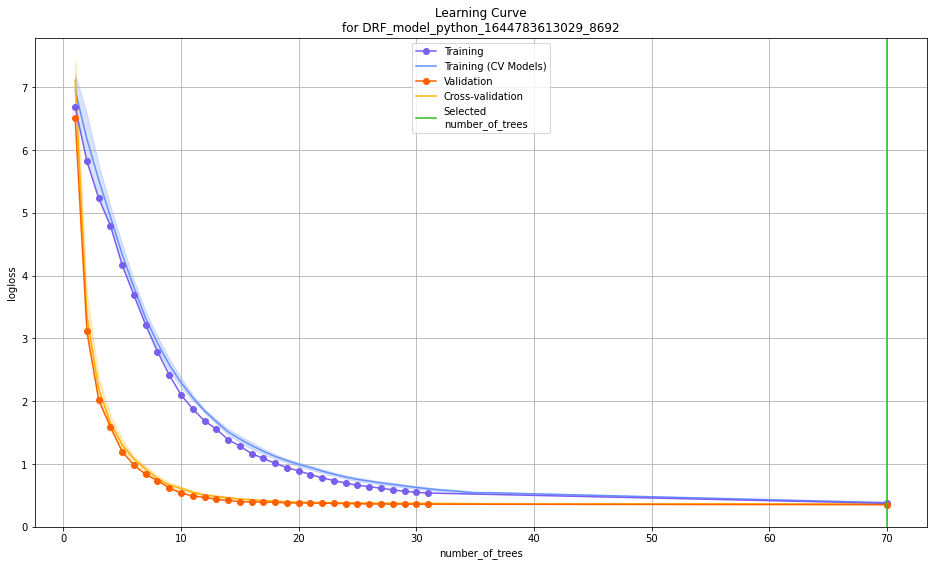

In [ ]:
drf.learning_curve_plot()

In [ ]:
drf.accuracy()

[[0.4291203465615532, 0.8467460683029545]]

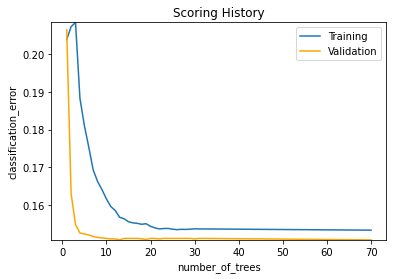

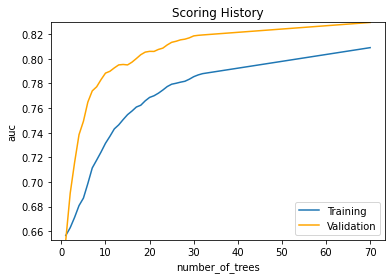

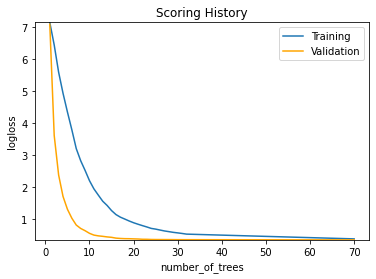

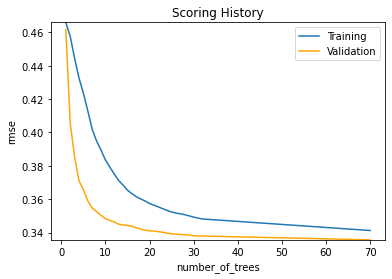

In [ ]:
drf.plot(metric='classification_error')
print("")
drf.plot(metric='auc')
print("")
drf.plot(metric='logloss')
print("")
drf.plot(metric='rmse')


## Conclusion

After looking at the accuracy and performance metrics, we can conclude that a Machine Learning model can be used to automate the 'Bank Loan Application'. By doing so we can accurately predict and decide based on a customer and his/her finance data if he/she could pay off entire loan or it would turn a bad loan debt.

The DRF 'Distributed Random Forest' has shown the better accuracy, precision and recall value among various models like 'XRT', 'GBM' and 'XGBoost' with AUC 82.50%, MSE 0.11 and RMSE 0.34 for DRF.

Also, after performing regularization the AUC has increased and MSE, RMSE has decreased compared to base model, also F1 and F2 Score seems to be balanced and better which indicated that model has performed better

The Accuracy, Precision and Recall value of the 'DRF' model can be improved further even though Decison Tree based model often settle with accurcy at certain point and doesn't improve further.


## References


1. https://github.com/nikbearbrown/AI_Research_Group/blob/main/Kaggle_Datasets/AutoML/VAI_Churn_H2O_automl.ipynb
2. https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09
3. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html
4. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html

## License


MIT License

Copyright (c) 2022 Sanket Sanap

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
